### Get the most positive and negative online reviews about a business

How well to the ratings match the sentiment of the review text? 

- Learn the Yelp API https://www.yelp.com/developers
- Search for a business and get reviews
- Use Azure Text Analytics https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/
- Get sentiment of reviews
- Time permitting do negative
- Demonstrate the problem simplification approach

In [19]:
import requests
from IPython.display import display, Image, HTML
from ipywidgets import widgets, interact_manual

## Sentiment

In [20]:
def get_sentiment(text):
    key = '045fae3d312d4f30aee929a8832b2ad9'
    endpoint = 'https://ist256-mafudge-cogsvcs.cognitiveservices.azure.com/'
    url = f'{endpoint}text/analytics/v3.1/sentiment'
    header = { 'Ocp-Apim-Subscription-Key' : key}

    documents = {"documents": [{"id": "1", "language": "en","text": text}]}

    response = requests.post(url, headers=header, json=documents)
    response.raise_for_status()
    data = response.json()

    return data['documents'][0]['sentiment']

print(get_sentiment("I do not like green edds and ham. I do not like them sam I am."))
print(get_sentiment("I like scotch. Scotchy-scotch, scotch."))

neutral
positive


In [28]:
# search 
yelp_api_key = "bcUbCv7c-dgdpowttFnZdu6A3xSH0AbwnnJuurueUOispj2AVl9vQnKm6i2PFg6-yYkYR4-7pv7pLGjqCM2k-qa1znFlTU0OSaZDcgX2Gj9LdpvxFLMF8weLNjNUZHYx"
url = "https://api.yelp.com/v3/businesses/search"
header = { "Authorization" : f"Bearer {yelp_api_key}" }
query = { "term" : "thai", "location" : "Syracuse, NY" }
response = requests.get(url, params = query, headers = header)
data = response.json()


In [32]:
data['businesses'][0]['name']

'Thai Flavor'

In [36]:
from IPython.display import display, Image
image_url = data['businesses'][0]['image_url']
display(Image(url=image_url, width=200))

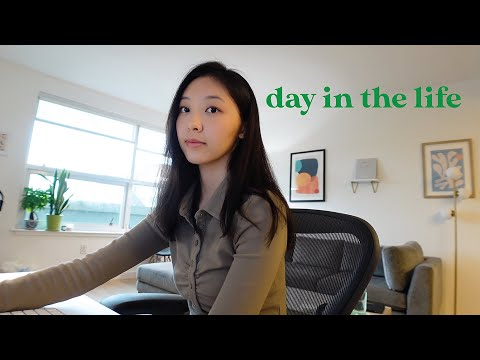

In [37]:
# Show a Youtube video
from IPython.display import YouTubeVideo
YouTubeVideo("pLon_Mit7sk")

In [22]:
# get details 
id = "xkU58y1YhdcZFDqq_ENQGA"
url = f"https://api.yelp.com/v3/businesses/{id}"
response = requests.get(url, headers = header)
response.json()

{'id': 'xkU58y1YhdcZFDqq_ENQGA',
 'alias': 'erawan-thai-restaurant-syracuse',
 'name': 'Erawan Thai Restaurant',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/ahM2S3W2EHq5R8n9Oi_h5g/o.jpg',
 'is_claimed': False,
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/erawan-thai-restaurant-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_lookup&utm_source=H2mBmGHSsANIEiZZaA4ZyA',
 'phone': '+13154458152',
 'display_phone': '(315) 445-8152',
 'review_count': 145,
 'categories': [{'alias': 'thai', 'title': 'Thai'}],
 'rating': 3.5,
 'location': {'address1': '2724 Erie Blvd E',
  'address2': '',
  'address3': '',
  'city': 'Syracuse',
  'zip_code': '13224',
  'country': 'US',
  'state': 'NY',
  'display_address': ['2724 Erie Blvd E', 'Syracuse, NY 13224'],
  'cross_streets': ''},
 'coordinates': {'latitude': 43.05378, 'longitude': -76.09696},
 'photos': ['https://s3-media1.fl.yelpcdn.com/bphoto/ahM2S3W2EHq5R8n9Oi_h5g/o.jpg',
  'ht

In [23]:
# get reviews 
id = "xkU58y1YhdcZFDqq_ENQGA"
url = f"https://api.yelp.com/v3/businesses/{id}/reviews"
response = requests.get(url, headers = header)
response.json()

{'reviews': [{'id': 'cqF5fd0NaDtn4sjufoWfxQ',
   'url': 'https://www.yelp.com/biz/erawan-thai-restaurant-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&hrid=cqF5fd0NaDtn4sjufoWfxQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=H2mBmGHSsANIEiZZaA4ZyA',
   'text': 'Very impressed with the authenticity and the service. Be sure to note that the soups have MSG. The staff are very aware of dietary concerns and can give...',
   'rating': 4,
   'time_created': '2023-07-14 09:58:14',
   'user': {'id': 'Dj2SQhUwcZD4Bo4G9d4cow',
    'profile_url': 'https://www.yelp.com/user_details?userid=Dj2SQhUwcZD4Bo4G9d4cow',
    'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/_Q-LbdtbUdP7uQuQ5CNjgg/o.jpg',
    'name': 'Fridah L.'}},
  {'id': 'MyP2iz5wWduV5i5jcIcfmw',
   'url': 'https://www.yelp.com/biz/erawan-thai-restaurant-syracuse?adjust_creative=H2mBmGHSsANIEiZZaA4ZyA&hrid=MyP2iz5wWduV5i5jcIcfmw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=H2mBmGHSs

In [24]:
get_sentiment("I don't give one star reviews lightly, nor do I ever throw out food, but Erawan has forced me to do both.  I ordered pad Thai from here.")

'negative'

In [25]:

def yelp_search(term, location):
    querystring = { 'term' : term, 'location' : location }
    header = { 'Authorization' : f'Bearer {yelp_api_key}'}
    search_url = "https://api.yelp.com/v3/businesses/search"
    response = requests.get(search_url, params = querystring, headers=header)
    return response.json()

def yelp_details(id):
    header = { 'Authorization' : f'Bearer {yelp_api_key}'}
    details_url = f"https://api.yelp.com/v3/businesses/{id}"
    response = requests.get(details_url, headers = header)
    return response.json()
        
def yelp_reviews(id):
    header = { 'Authorization' : f'Bearer {yelp_api_key}'}
    details_url = f"https://api.yelp.com/v3/businesses/{id}/reviews"
    response = requests.get(details_url, headers = header)
    return response.json()


In [27]:
# main program 
@interact_manual(cuisine="", location="")
def on_click(cuisine, location):
    results = yelp_search(cuisine, location)

    display(HTML(f"<h1>{cuisine.title()} in {location}"))
    for business in results['businesses']:
        display(HTML(f"<h2>Review Analysis for <em>{business['name']}</em></h2>"))
        display(Image(business['image_url'], width=200))
        reviews = yelp_reviews(business['id'])
        for review in reviews['reviews']:
            sentiment = get_sentiment(review['text'])
            username = review['user']['name']
            rating = review['rating']
            display(HTML(f"<li>{username} Rating: {rating} Sentiment: {sentiment}"))

interactive(children=(Text(value='', continuous_update=False, description='cuisine'), Text(value='', continuou…